<a href="https://colab.research.google.com/github/Karishma-Kuria/KMean-Clustering-Using-Scikit-Pytorch/blob/main/K_MeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains 

In [127]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as mp
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
event_path = "/content/drive/MyDrive/ML_DataSet/events.csv"
info_path = "/content/drive/MyDrive/ML_DataSet/ginf.csv"

game_events = pd.read_csv(event_path)
game_info = pd.read_csv(info_path)

In [129]:
game_events.head()
game_events.shape

(941009, 22)

In [130]:
game_info.shape
game_info.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [131]:
dict_path = "/content/drive/MyDrive/ML_DataSet/dictionary.txt"
encoding_dict = pd.read_table(dict_path, delim_whitespace = False, names = ('nums', 'events'))
# mapping the Column values from dictionary to the cloumns of events dataset
event_type = encoding_dict[1:13]
event_type2 = encoding_dict[14:18]
side = encoding_dict[19:21]
shot_place = encoding_dict[22:35]
shot_outcome = encoding_dict[36:40]
location = encoding_dict[41:60]
bodypart = encoding_dict[61:64]
assist_method = encoding_dict[65:70]
situation = encoding_dict[71:75]

In [ ]:
event_type

In [ ]:
side

In [ ]:
goals_scored=game_events[game_events["is_goal"]==1]
goals_scored

In [ ]:
fig = plot.figure(figsize=(10,8))
plot.hist(goals_scored[goals_scored["side"]==1]["time"],width=0.5,bins=100,color="cyan",label="home goals")   
plot.hist(goals_scored[goals_scored["side"]==2]["time"],width=0.5,bins=100,color="grey",label="away goals") 
plot.xlabel("Minutes")
plot.ylabel("Number of goals")
plot.legend()
plot.title("Number of goals (by home/away side) against Time during match")

In [136]:
yellow_sec=game_events[game_events["event_type"]==5]
red=game_events[game_events["event_type"]==6]
reds_total=[yellow_sec,red]
total_red_cards=pd.concat(reds_total)
total_red_cards.event_type.unique()

array([5, 6])

In [ ]:
red_home=total_red_cards[total_red_cards["side"]==1].shape[0]
red_away=total_red_cards[total_red_cards["side"]==2].shape[0]

red_combi=pd.DataFrame({"home":red_home,"away":red_away},index=["Red cards"])
red_combi.plot(kind="bar")
plot.title("Number of Red cards (Home/Away)",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
red_combi

In [138]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plot.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plot.tight_layout()

In [ ]:
df_shot_places = game_events[(game_events['event_type'] == 1) & 
                           (game_events['is_goal'] == 1)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place['events'], 'Shot places', 'Number of events',
    'Shot places resulting in goals', 'BuGn_r', 8, 5)

In [ ]:
## Grouping attempts by team
grouping_by_offensive = game_events[game_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', '# of goals', 'Most offensive teams', 'GnBu_d', 8, 6)

In [ ]:
## grouping by player when is goal
grouping_by_offensive_player = game_events[game_events['is_goal']==1].groupby('player')

## Couting and sorting the number of goals by player, then pick the top 10
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:10]
## Extracting player names
players = grouping_by_offensive_player.index
## Extracting values (# of goals)
scores = grouping_by_offensive_player['id_event']
scores
## Plotting the chart
#plot_barplot(scores, players, 'Players', '# of score', 'Most offensive players', 'GnBu_d', 8, 6)

In [ ]:
grouping_by_offensive_player = game_events[game_events['is_goal']==1].groupby('player')
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event', ascending=False)[:10]
grouping_by_offensive_player['id_event']

In [ ]:
import plotly.express as px
#fig = px.scatter(game_events,x="assist_method",y= "is_goal",color="player",text="Name",title="Goals Vs Assists")
#fig.update_traces(textposition='top center')
#fig.show()
plot_barplot(grouping_by_offensive_player['id_event'], players, 'Players', '# of score', 'Goals Vs Assists', 'GnBu_d', 8, 6)

In [ ]:
plot.rcParams['figure.figsize'] = (18, 6)

plot.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(scores)
plot.title('Goals Distribution', fontsize = 20)
plot.xlabel('Goals')
plot.ylabel('Count')

plot.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(game_events['assist_method'], color = 'yellow')
plot.title('Assists Distribution', fontsize = 20)
plot.xlabel('Assists Distribution')
plot.ylabel('Count')
plot.show()

In [ ]:
X= np.array(list(zip(scores, game_events['assist_method'])))
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plot.plot(range(1,11), wcss,)
plot.title('The Elbow Method')
plot.xlabel('no of clusters')
plot.ylabel('wcss')
plot.show()

Based on the result of elbow method we can get the number of cluster=4

In [146]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
game_events["label"]=pd.Series(labels)
game_events.loc[game_events['label'] == 3, 'Category'] = 'magician'
game_events.loc[game_events['label'] == 2, 'Category'] = 'Star Performer'
game_events.loc[game_events['label'] == 1, 'Category'] = 'Tornado'
game_events.loc[game_events['label'] == 0, 'Category'] = 'contributer'
game_events = game_events.fillna(0)

In [ ]:
game_events['Category']

In [ ]:
fig = px.scatter(game_events['is_goal'],game_events['side'],color=game_events['Category'],text=game_events['player'],title="K-mean clustering of Assists VS Goals")
fig.update_traces(textposition='top center')
fig.show()
#plot.plot(scores, game_events['assist_method'], color= game_events['Category'], text="Name",title="K-mean clustering of Assists VS Goals")
#plot.show()

In [ ]:
df1 = game_events[['event_team','event_type', 'event_type2','location', 'assist_method', 'situation', 'bodypart']]

df1.groupby('event_team')
df2 = df1.groupby('event_team', group_keys=False)
k = df1['event_team'].sort_values().unique()

appended_data = []
df1
for col in df1.columns[df1.columns != 'event_team']: 
    #print(col)
    appended_data.append(df2[col].value_counts(dropna=True).sort_index().unstack(col).add_prefix(col+'_'))

df3 = pd.concat(appended_data, axis=1)    
df3['Event team'] = k
df3.head()
#event_type['events']

In [150]:
gam = game_info['ht'].value_counts() + game_info['at'].value_counts()

df3['games'] = gam
df3.head(5)

for i in df3.columns:
    if (type(df3[i][0]) == np.float64) | (type(df3[i][0]) == np.int64):
        df3[i] = df3[i].div(gam, axis=0)

In [ ]:
df3.rename(columns={'location_10.0': 'location_10'}, inplace = True)
#df3['games'] = gam
for col in df3.columns:   
    if col.endswith('.0'):
        col1 = col.strip('.0')
    else:
        col1 = col
    df3 = df3.rename(columns={col : col1})   

print(df3.columns)


In [152]:
f = open("/content/drive/MyDrive/ML_DataSet/dictionary.txt", "r")
x = []
k = []
r = []
for lines in f:
    x.append(lines.split())

line_base = x[0][0]

for line in x:
    if len(line) > 1:        
        ll = ''
        for j in range(1, len(line)):
            if j < (len(line) - 1):
                ll = ll + line[j] + ' '
            else:
                ll = ll + line[j]
        k.append([line_base + '_' + line[0], ll])
                
    elif len(line) == 1:
        line_base = line[0]
print(k)

[['event_type_0', 'Announcement'], ['event_type_1', 'Attempt'], ['event_type_2', 'Corner'], ['event_type_3', 'Foul'], ['event_type_4', 'Yellow card'], ['event_type_5', 'Second yellow card'], ['event_type_6', 'Red card'], ['event_type_7', 'Substitution'], ['event_type_8', 'Free kick won'], ['event_type_9', 'Offside'], ['event_type_10', 'Hand ball'], ['event_type_11', 'Penalty conceded'], ['event_type2_12', 'Key Pass'], ['event_type2_13', 'Failed through ball'], ['event_type2_14', 'Sending off'], ['event_type2_15', 'Own goal'], ['side_1', 'Home'], ['side_2', 'Away'], ['shot_place_1', 'Bit too high'], ['shot_place_2', 'Blocked'], ['shot_place_3', 'Bottom left corner'], ['shot_place_4', 'Bottom right corner'], ['shot_place_5', 'Centre of the goal'], ['shot_place_6', 'High and wide'], ['shot_place_7', 'Hits the bar'], ['shot_place_8', 'Misses to the left'], ['shot_place_9', 'Misses to the right'], ['shot_place_10', 'Too high'], ['shot_place_11', 'Top centre of the goal'], ['shot_place_12', 

In [ ]:
i = 0
for col in k:    
    if col[0] in df3.columns:        
        df3 = df3.rename(columns={col[0] : col[1]})
    
print(df3.columns)

In [154]:
df3.drop('Not recorded', axis=1, inplace=True)

def column_sum(a,b):
    c = df3[[a,b]].sum(axis=1)    
    df3.drop([a,b], axis=1, inplace=True)
    return c    

df3['Foot'] = column_sum('right foot','left foot')
df3['Wing'] = column_sum('Right wing','Left wing')
df3['Difficult angle'] = column_sum('Difficult angle on the left','Difficult angle on the right')
df3['Side of the box'] = column_sum('Left side of the box','Right side of the box')
df3['Side of the six yard box'] = column_sum('Left side of the six yard box','Right side of the six yard box')

In [155]:
df3.rename(columns={'head': 'Head'}, inplace = True) 
df3.drop('games', axis=1, inplace=True)
df3.drop('Second yellow card', axis=1, inplace=True)


In [213]:
df3.dropna(axis=0,inplace=True)
df3.head()
#df3.shape

,Attempt,Corner,Foul,Yellow card,Red card,Substitution,Free kick won,Offside,Hand ball,Penalty conceded,event_type2_,Key Pass,Failed through ball,Sending off,Own goal,location_,Attacking half,Defensive half,Centre of the box,Difficult angle and long range,Very close range,Penalty spot,Outside the box,Long range,More than 35 yards,More than 40 yards,None,Pass,Cross,Headed pass,Through ball,situation_,Open play,Set piece,Corner,Free kick,bodypart_,Head,Event team,Foot,Wing,Difficult angle,Side of the box,Side of the six yard box
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,9.701754,3.938596,13.973684,2.087719,0.105263,2.692982,13.456140,3.201754,0.842105,0.131579,40.061404,6.684211,3.201754,0.149123,0.035088,26.973684,2.500000,7.456140,2.947368,0.078947,0.236842,0.131579,4.008772,0.210526,0.175439,0.026316,43.447368,4.298246,1.736842,0.377193,0.271930,40.429825,8.008772,0.754386,0.649123,0.289474,40.429825,1.456140,AC Ajaccio,8.245614,3.500000,0.166667,1.429825,0.219298
AC Milan,14.595238,5.833333,12.747619,2.376190,0.085714,2.823810,13.523810,2.585714,0.609524,0.200000,42.095238,10.476190,2.585714,0.185714,0.052381,27.276190,3.204762,7.066667,3.733333,0.047619,0.442857,0.242857,6.976190,0.109524,0.090476,0.004762,44.919048,7.409524,2.271429,0.290476,0.504762,40.800000,12.452381,0.685714,1.042857,0.414286,40.800000,1.623810,AC Milan,12.971429,3.252381,0.300000,2.242857,0.300000
AS Monaco,12.333333,5.385185,12.340741,1.800000,0.059259,2.851852,12.859259,2.111111,0.785185,0.214815,39.466667,9.029630,2.111111,0.081481,0.051852,25.548148,3.014815,6.281481,4.133333,0.059259,0.414815,0.192593,4.496296,0.081481,0.066667,0.014815,41.711111,5.585185,2.688889,0.362963,0.392593,38.407407,10.274074,0.637037,1.051852,0.370370,38.407407,2.177778,AS Monaco,10.155556,3.562963,0.259259,1.918519,0.562963
AS Nancy Lorraine,11.020833,3.708333,13.125000,1.666667,0.072917,2.416667,12.229167,2.645833,0.697917,0.125000,36.729167,8.239583,2.645833,0.083333,0.010417,24.458333,2.489583,6.437500,2.718750,0.072917,0.291667,0.104167,5.229167,0.177083,0.166667,0.020833,39.468750,5.447917,2.010417,0.437500,0.343750,36.687500,9.104167,0.718750,0.895833,0.302083,36.687500,1.750000,AS Nancy Lorraine,9.270833,3.302083,0.156250,1.739583,0.302083
AS Roma,15.509524,6.019048,11.914286,2.304762,0.080952,2.833333,13.100000,2.176190,0.547619,0.190476,40.690476,11.642857,2.176190,0.138095,0.028571,26.066667,3.161905,7.104762,4.190476,0.128571,0.428571,0.185714,6.757143,0.123810,0.095238,0.014286,43.033333,8.161905,2.257143,0.404762,0.819048,39.166667,13.261905,0.633333,1.223810,0.390476,39.166667,1.776190,AS Roma,13.733333,2.833333,0.371429,2.695238,0.409524


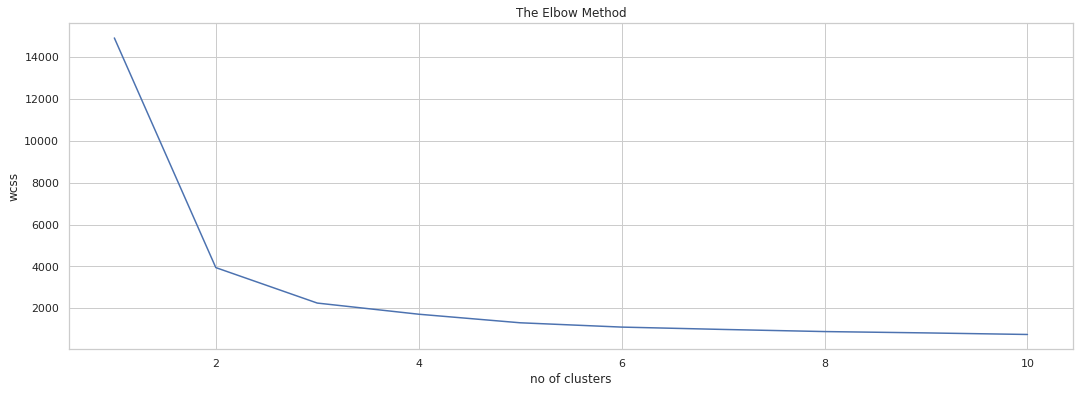

In [196]:
#X= np.array(list(zip(df3['Attempt'], df3['Foul'])))
X=df3.iloc[:, 0:38].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans_model = kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plot.plot(range(1,11), wcss,)
plot.title('The Elbow Method')
plot.xlabel('no of clusters')
plot.ylabel('wcss')
plot.show()

In [197]:
def applyKMean(array1, array2, color, marker):
  plot.plot()
  colors = color
  markers = marker
  plot.title('K-mean clustering of Foul VS Attempts')
  plot.xlabel('Attempt')
  plot.ylabel('Foul')
  plot.plot()
  for i, l in enumerate(kmeans_model.labels_):
    plot.plot(array1[i], array2[i], color=colors[l], marker=markers[l],ls='None')
    plot.xlim([0, 20])
    plot.ylim([0, 20])
  plot.show()

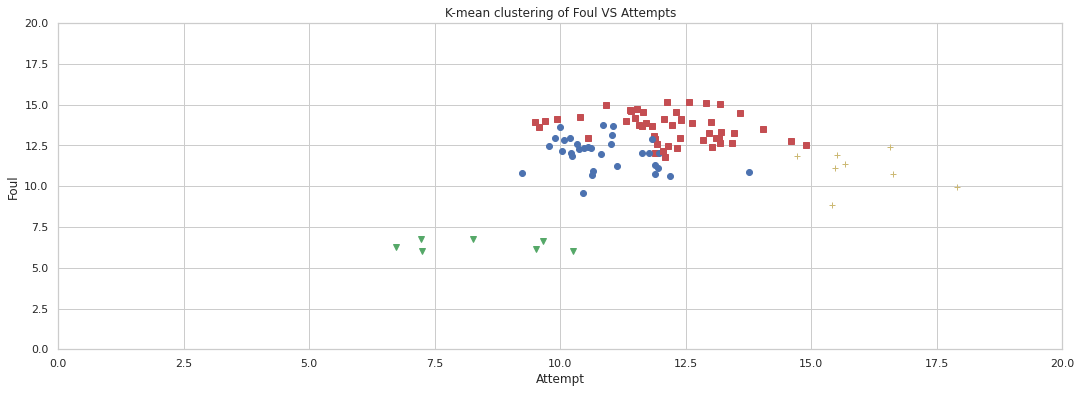

In [198]:
colors = ['b', 'g', 'r','y']
markers = ['o', 'v', 's','+']
kmeans_model = KMeans(4).fit(X)
applyKMean(df3['Attempt'], df3['Foul'], colors, markers)

# plotting the cluster centers and the data points on a 2D plane


## **K-Mean Using Pytorch**

In [242]:
!pip install kmeans-pytorch

In [243]:
import torch
import numpy as np
from kmeans_pytorch import kmeans, kmeans_predict

In [265]:
# data
num_clusters = 6
x = df3.iloc[:, 0:2].values
x = torch.from_numpy(x)

In [266]:
# set device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [267]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cpu..


[running kmeans]: 11it [00:00, 112.12it/s, center_shift=0.000000, iteration=11, tol=0.000100]


In [268]:
print(cluster_ids_x)
print(cluster_centers)

tensor([4, 2, 1, 0, 2, 0, 1, 1, 3, 2, 4, 3, 2, 1, 1, 2, 1, 1, 1, 3, 1, 4, 4, 0,
        4, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 4, 0, 2, 2, 0,
        0, 3, 4, 3, 4, 1, 3, 1, 1, 1, 5, 3, 1, 0, 2, 0, 1, 1, 3, 3, 3, 1, 2, 1,
        1, 4, 3, 3, 3, 3, 4, 0, 4, 1, 0, 5, 5, 1, 3, 4, 1, 0, 1, 1, 1, 3, 0, 1,
        5])
tensor([[10.6001,  4.3195],
        [11.9104,  4.8560],
        [15.7361,  5.9189],
        [13.2163,  5.1553],
        [ 9.7701,  3.8860],
        [ 7.3644,  2.9858]])


In [269]:
# more data
y = df3.iloc[:, 2:4].values
y = torch.from_numpy(y)
y

tensor([[13.9737,  2.0877],
        [12.7476,  2.3762],
        [12.3407,  1.8000],
        [13.1250,  1.6667],
        [11.9143,  2.3048],
        [12.8158,  2.9211],
        [13.7299,  2.7488],
        [12.0096,  2.6220],
        [12.8086,  2.6986],
        [ 8.8565,  1.7560],
        [12.4651,  2.0640],
        [13.5134,  1.7968],
        [10.7487,  1.2193],
        [13.8895,  2.5698],
        [12.0427,  1.7393],
        [11.3583,  1.2620],
        [11.2941,  1.5080],
        [12.0672,  1.5224],
        [14.5814,  2.8140],
        [15.0351,  2.4561],
        [12.0292,  2.7018],
        [14.1316,  2.6711],
        [ 6.1226,  1.1226],
        [14.9716,  2.5308],
        [10.8158,  2.4211],
        [11.2647,  1.6838],
        [11.0902,  2.5113],
        [12.9661,  2.0169],
        [12.9684,  2.6000],
        [14.2129,  2.4000],
        [12.1842,  2.8684],
        [12.1753,  2.2990],
        [14.2679,  3.2010],
        [14.0481,  1.9091],
        [12.2605,  1.7143],
        [12.5190,  2

In [271]:
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cpu..


In [272]:
print(cluster_ids_y)

tensor([3, 1, 0, 1, 0, 1, 3, 0, 1, 5, 1, 3, 4, 3, 0, 4, 4, 0, 3, 3, 1, 3, 5, 3,
        4, 4, 0, 1, 1, 3, 1, 0, 3, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 3, 4, 0, 1, 3,
        4, 3, 1, 1, 5, 4, 1, 3, 0, 3, 5, 1, 1, 3, 4, 1, 1, 3, 4, 3, 1, 1, 4, 4,
        3, 0, 0, 3, 3, 1, 3, 1, 3, 1, 1, 5, 5, 3, 3, 5, 3, 4, 1, 3, 3, 3, 0, 3,
        5])


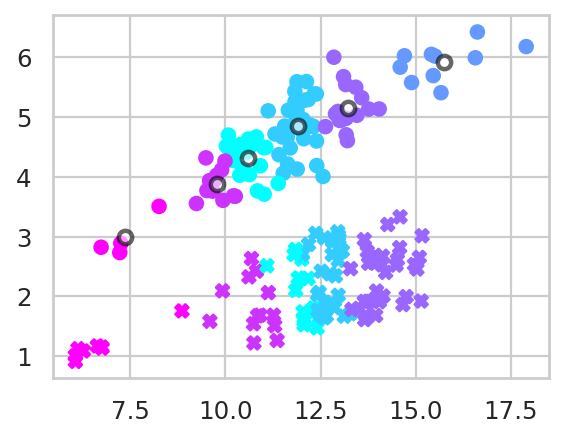

In [279]:
# plot
plot.figure(figsize=(4, 3), dpi=160)
plot.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plot.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plot.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
#plot.axis([10, 1, 10, 1])
#plot.tight_layout()
plot.show()